<a href="https://colab.research.google.com/github/NanzibaBasnin/Regenerative_Fish_Firming/blob/main/Sink_TEA_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving flux_data_07_21_22_metadata.csv to flux_data_07_21_22_metadata.csv


In [ ]:
import pandas as pd

# Replace this with your dataset's file path
file_path = 'flux_data_07_21_22_metadata.csv'

# Read the CSV file into a Pandas DataFrame
dataset = pd.read_csv(file_path)

# Print the column names
for column in dataset.columns:
    print(column)


Run #
capex
linecost
labor
harvcost
transportcost
transportems
maintenanceboatems
insur
license
opex
sinkval
sequestration_rate
removal_rate
productval
avoidedems_product
convertcost
convertems
depth_mult
wave_mult
seaweed_map
prod_cost_low1p_avg
percentile_0.2_prodcost_avg
percentile_0.4_prodcost_avg
percentile_0.6_prodcost_avg
percentile_0.8_prodcost_avg
percentile_1_prodcost_avg
prod_cost_avg_northatlantic
prod_cost_avg_southatlantic
prod_cost_avg_northpacific
prod_cost_avg_centralpacific
prod_cost_avg_southpacific
prod_cost_avg_indian
net_costperton_sink_low1p_avg
percentile_0.2_sinkcost_avg
percentile_0.4_sinkcost_avg
percentile_0.6_sinkcost_avg
percentile_0.8_sinkcost_avg
percentile_1_sinkcost_avg
net_costperton_sink_avg_northatlantic
net_costperton_sink_avg_southatlantic
net_costperton_sink_avg_northpacific
net_costperton_sink_avg_centralpacific
net_costperton_sink_avg_southpacific
net_costperton_sink_avg_indian
net_costperton_product_low1p_avg
percentile_0.2_productcost_avg
per

In [ ]:
# Pandas is used for data manipulation
import pandas as pd

# Use numpy to convert to arrays
import numpy as np
import os
import lightgbm as lgbm
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_learning_curves

# Read in data and display first 5 rows
meta_file = os.path.expanduser('flux_data_07_21_22_metadata.csv')
features = pd.read_csv(meta_file)


In [ ]:
print(features.columns)


Index(['Run #', 'capex', 'linecost', 'labor', 'harvcost', 'transportcost',
       'transportems', 'maintenanceboatems', 'insur', 'license', 'opex',
       'sinkval', 'sequestration_rate', 'removal_rate', 'productval',
       'avoidedems_product', 'convertcost', 'convertems', 'depth_mult',
       'wave_mult', 'seaweed_map', 'prod_cost_low1p_avg',
       'percentile_0.2_prodcost_avg', 'percentile_0.4_prodcost_avg',
       'percentile_0.6_prodcost_avg', 'percentile_0.8_prodcost_avg',
       'percentile_1_prodcost_avg', 'prod_cost_avg_northatlantic',
       'prod_cost_avg_southatlantic', 'prod_cost_avg_northpacific',
       'prod_cost_avg_centralpacific', 'prod_cost_avg_southpacific',
       'prod_cost_avg_indian', 'net_costperton_sink_low1p_avg',
       'percentile_0.2_sinkcost_avg', 'percentile_0.4_sinkcost_avg',
       'percentile_0.6_sinkcost_avg', 'percentile_0.8_sinkcost_avg',
       'percentile_1_sinkcost_avg', 'net_costperton_sink_avg_northatlantic',
       'net_costperton_sink_avg

In [ ]:
# Labels are the values we want to predict
#print(features.columns)
labels = np.array(features['percentile_0.2_sinkcost_avg'])

growth = 0
sinking = 1
products = 0

features = features.drop('column_name', axis=1, errors='ignore')

# Remove the labels from the features
# axis 1 refers to the columns
if growth==1:
    features= features.drop('removal_rate', axis = 1)
    features= features.drop('avoidedems_product', axis = 1)
    features= features.drop('productval', axis = 1)
    features= features.drop('convertcost', axis = 1)
    features= features.drop('convertems', axis = 1)
    features= features.drop('sinkval', axis = 1)
    features= features.drop('sequestration_rate', axis = 1)

if sinking==1:
    features= features.drop('avoidedems_product', axis = 1)
    features= features.drop('productval', axis = 1)
    features= features.drop('convertcost', axis = 1)
    features= features.drop('convertems', axis = 1)

if products==1:
    features= features.drop('removal_rate', axis = 1)
    features= features.drop('sinkval', axis = 1)
    features= features.drop('sequestration_rate', axis = 1)

#features= features.drop('Unnamed: 0', axis = 1)
features= features.drop('net_costperton_product_low1p_avg', axis = 1)
features= features.drop('net_costperton_sink_low1p_avg', axis = 1)
features= features.drop('prod_cost_low1p_avg', axis = 1)
features= features.drop('percentile_0.2_prodcost_avg', axis = 1)
features= features.drop('percentile_0.4_prodcost_avg', axis = 1)
features= features.drop('percentile_0.6_prodcost_avg', axis = 1)
features= features.drop('percentile_0.8_prodcost_avg', axis = 1)
features= features.drop('percentile_1_prodcost_avg', axis = 1)
features= features.drop('prod_cost_avg_northatlantic', axis = 1)
features= features.drop('prod_cost_avg_southatlantic', axis = 1)
features= features.drop('prod_cost_avg_northpacific', axis = 1)
features= features.drop('prod_cost_avg_centralpacific', axis = 1)
features= features.drop('prod_cost_avg_southpacific', axis = 1)
features= features.drop('prod_cost_avg_indian', axis = 1)
features= features.drop('percentile_0.2_sinkcost_avg', axis = 1)
features= features.drop('percentile_0.4_sinkcost_avg', axis = 1)
features= features.drop('percentile_0.6_sinkcost_avg', axis = 1)
features= features.drop('percentile_0.8_sinkcost_avg', axis = 1)
features= features.drop('percentile_1_sinkcost_avg', axis = 1)
features= features.drop('net_costperton_sink_avg_northatlantic', axis = 1)
features= features.drop('net_costperton_sink_avg_southatlantic', axis = 1)
features= features.drop('net_costperton_sink_avg_northpacific', axis = 1)
features= features.drop('net_costperton_sink_avg_centralpacific', axis = 1)
features= features.drop('net_costperton_sink_avg_southpacific', axis = 1)
features= features.drop('net_costperton_sink_avg_indian', axis = 1)
features= features.drop('percentile_0.2_productcost_avg', axis = 1)
features= features.drop('percentile_0.4_productcost_avg', axis = 1)
features= features.drop('percentile_0.6_productcost_avg', axis = 1)
features= features.drop('percentile_0.8_productcost_avg', axis = 1)
features= features.drop('percentile_1_productcost_avg', axis = 1)
features= features.drop('net_costperton_product_avg_northatlantic', axis = 1)
features= features.drop('net_costperton_product_avg_southatlantic', axis = 1)
features= features.drop('net_costperton_product_avg_northpacific', axis = 1)
features= features.drop('net_costperton_product_avg_centralpacific', axis = 1)
features= features.drop('net_costperton_product_avg_southpacific', axis = 1)
features= features.drop('net_costperton_product_avg_indian', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
print("Feature list:", feature_list)
#print("Features as numpy array:", features)


Feature list: ['Run #', 'capex', 'linecost', 'labor', 'harvcost', 'transportcost', 'transportems', 'maintenanceboatems', 'insur', 'license', 'opex', 'sinkval', 'sequestration_rate', 'removal_rate', 'depth_mult', 'wave_mult', 'seaweed_map']


In [ ]:
print("Feature list:")
for feature in feature_list:
    print(feature)


Feature list:
Run #
capex
linecost
labor
harvcost
transportcost
transportems
maintenanceboatems
insur
license
opex
sinkval
sequestration_rate
removal_rate
depth_mult
wave_mult
seaweed_map


In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print(train_labels)
train_features = train_features[train_labels > 0]
train_labels = train_labels[train_labels > 0]
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
test_features = test_features[test_labels > 0]
test_labels = test_labels[test_labels > 0]
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print(test_labels[test_labels < 0])

[1263.32737777 1271.00158828  514.8845324  ... 1703.32350249 2264.81831539
 4725.06644897]
Training Features Shape: (3750, 17)
Training Labels Shape: (3750,)
Testing Features Shape: (1250, 17)
Testing Labels Shape: (1250,)
[]


Gradient-Boosting Regression Mean Squared Error: 38049.07 ppm
Gradient-Boosting Regression R²: 0.98
Gradient-Boosting Regression Mean Absolute Error: 126.35 ppm
Gradient-Boosting Regression Accuracy: 94.66 %.
Variable: seaweed_map          Gradient-Boosting Regression Importance: 0.4
Variable: linecost             Gradient-Boosting Regression Importance: 0.32
Variable: removal_rate         Gradient-Boosting Regression Importance: 0.24
Variable: capex                Gradient-Boosting Regression Importance: 0.03
Variable: harvcost             Gradient-Boosting Regression Importance: 0.01
Variable: Run #                Gradient-Boosting Regression Importance: 0.0
Variable: labor                Gradient-Boosting Regression Importance: 0.0
Variable: transportcost        Gradient-Boosting Regression Importance: 0.0
Variable: transportems         Gradient-Boosting Regression Importance: 0.0
Variable: maintenanceboatems   Gradient-Boosting Regression Importance: 0.0
Variable: insur            

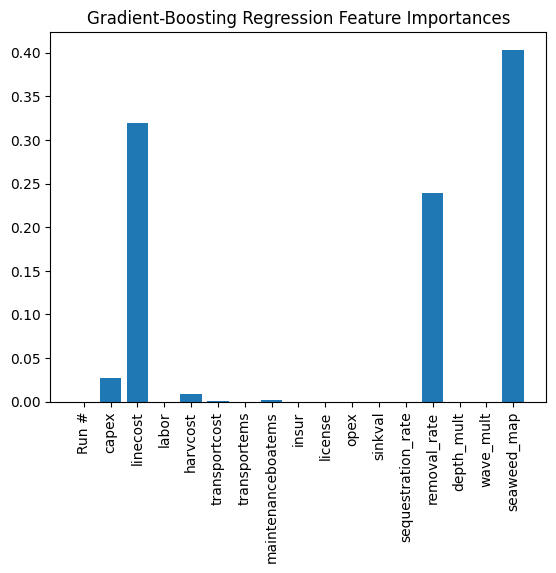

Gradient-Boosting Regression Training Accuracy 0.9921
Gradient-Boosting Regression Testing Accuracy 0.9797
Gradient-Boosting Regression Mean Squared Error: 38049.07 ppm
Gradient-Boosting Regression R²: 0.98
Gradient-Boosting Regression Mean Absolute Error: 126.35 ppm
Gradient-Boosting Regression Accuracy: 94.66 %.


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Initiate Gradient-Boosting Regression model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Perform 10-fold cross-validation
scores = cross_val_score(gb, train_features, train_labels, cv=10, scoring='neg_mean_absolute_error')

# Fit the Gradient-Boosting Regression model on training data
gb.fit(train_features, train_labels)

# Use the Gradient-Boosting Regression model's predict method on the test data
predictions_gb = gb.predict(test_features)

# Calculate the absolute errors
errors_gb = abs(predictions_gb - test_labels)

# Calculate mean squared error (MSE)
mse_gb = mean_squared_error(test_labels, predictions_gb)
print('Gradient-Boosting Regression Mean Squared Error:', round(mse_gb, 2), 'ppm')

# Calculate R²
r2_gb = r2_score(test_labels, predictions_gb)
print('Gradient-Boosting Regression R²:', round(r2_gb, 2))

# Calculate mean absolute error (MAE)
mae_gb = round(np.mean(errors_gb), 2)
print('Gradient-Boosting Regression Mean Absolute Error:', mae_gb, 'ppm')

# Calculate mean absolute percentage error (MAPE)
mape_gb = 100 * (errors_gb / test_labels)

# Calculate and display accuracy
accuracy_gb = 100 - np.mean(mape_gb)
print('Gradient-Boosting Regression Accuracy:', round(accuracy_gb, 2), '%.')

# Get feature importances
importances_gb = gb.feature_importances_

# List of tuples with variable and importance
feature_importances_gb = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_gb)]

# Sort the feature importances by most important first
feature_importances_gb = sorted(feature_importances_gb, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Gradient-Boosting Regression Importance: {}'.format(*pair)) for pair in feature_importances_gb];

# Plot the feature importances
import matplotlib.pyplot as plt
plt.bar(range(len(importances_gb)), importances_gb)
plt.xticks(range(len(importances_gb)), feature_list, rotation=90)
plt.title('Gradient-Boosting Regression Feature Importances')
plt.show()

# Printing the training and testing accuracy
print('Gradient-Boosting Regression Training Accuracy {:.4f}'.format(gb.score(train_features,train_labels)))
print('Gradient-Boosting Regression Testing Accuracy {:.4f}'.format(gb.score(test_features,test_labels)))
print('Gradient-Boosting Regression Mean Squared Error:', round(mse_gb, 2), 'ppm')
print('Gradient-Boosting Regression R²:', round(r2_gb, 2))
print('Gradient-Boosting Regression Mean Absolute Error:', mae_gb, 'ppm')
print('Gradient-Boosting Regression Accuracy:', round(accuracy_gb, 2), '%.')


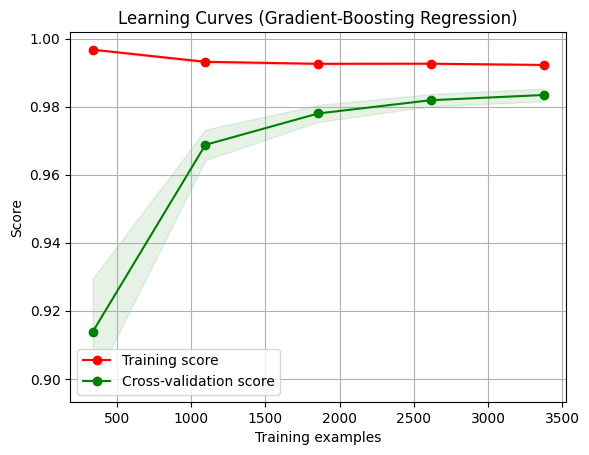

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Initiate Gradient-Boosting Regression model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Define function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Use the same train_features, train_labels and cross-validation (cv) settings as in your SVR model
title = "Learning Curves (Gradient-Boosting Regression)"
plot_learning_curve(gb, title, train_features, train_labels, cv=10, n_jobs=-1)
plt.show()


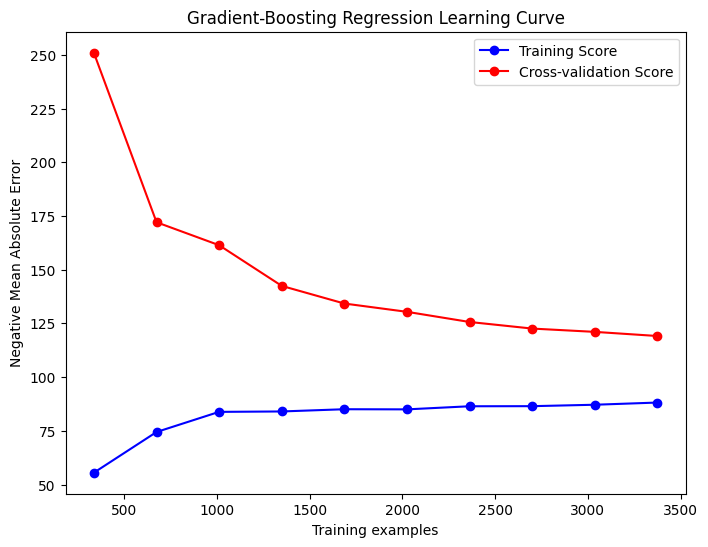

In [ ]:
from sklearn.model_selection import learning_curve

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(gb, train_features, train_labels, cv=10, scoring='neg_mean_absolute_error',
                                                        train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation Score')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Gradient-Boosting Regression Learning Curve')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Initiate Gradient-Boosting Regression model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Perform 10-fold cross-validation
scores = cross_val_score(gb, train_features, train_labels, cv=10, scoring='neg_mean_absolute_error')

# Fit the Gradient-Boosting Regression model on training data
gb.fit(train_features, train_labels)

# Use the Gradient-Boosting Regression model's predict method on the test data
predictions_gb = gb.predict(test_features)

# Calculate the absolute errors
errors_gb = abs(predictions_gb - test_labels)

from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error (MSE)
mse_gb = mean_squared_error(test_labels, predictions_gb)
print('Gradient-Boosting Regression Mean Squared Error:', round(mse_gb, 2), 'ppm')

# Calculate R²
r2_gb = r2_score(test_labels, predictions_gb)
print('Gradient-Boosting Regression R²:', round(r2_gb, 2))

# Print out the accuracy
print('Gradient-Boosting Regression Accuracy:', round(accuracy_gb, 2), '%.')


# Print out the mean absolute error (MAE)
print('Gradient-Boosting Regression Mean Absolute Error:', round(np.mean(errors_gb), 2), 'ppm')

# Calculate mean absolute percentage error (MAPE)
mape_gb = 100 * (errors_gb / test_labels)

# Calculate and display accuracy
accuracy_gb = 100 - np.mean(mape_gb)
print('Gradient-Boosting Regression Accuracy:', round(accuracy_gb, 2), '%.')

# Get feature importances
importances_gb = gb.feature_importances_

# List of tuples with variable and importance
feature_importances_gb = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_gb)]

# Sort the feature importances by most important first
feature_importances_gb = sorted(feature_importances_gb, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Gradient-Boosting Regression Importance: {}'.format(*pair)) for pair in feature_importances_gb];

# Plot the feature importances
import matplotlib.pyplot as plt
plt.bar(range(len(importances_gb)), importances_gb)
plt.xticks(range(len(importances_gb)), feature_list, rotation=90)
plt.title('Gradient-Boosting Regression Feature Importances')
plt.show()

# printing the training and testing accuracy
print('Gradient-Boosting Regression Training Accuracy {:.4f}'.format(gb.score(train_features,train_labels)))
print('Gradient-Boosting Regression Testing Accuracy {:.4f}'.format(gb.score(test_features,test_labels)))


Gradient-Boosting Regression Mean Squared Error: 38049.07 ppm
Gradient-Boosting Regression R²: 0.98
Gradient-Boosting Regression Mean Absolute Error: 126.35 ppm
Gradient-Boosting Regression Accuracy: 94.66 %.
Variable: seaweed_map          Gradient-Boosting Regression Importance: 0.4
Variable: linecost             Gradient-Boosting Regression Importance: 0.32
Variable: removal_rate         Gradient-Boosting Regression Importance: 0.24
Variable: capex                Gradient-Boosting Regression Importance: 0.03
Variable: harvcost             Gradient-Boosting Regression Importance: 0.01
Variable: Run #                Gradient-Boosting Regression Importance: 0.0
Variable: labor                Gradient-Boosting Regression Importance: 0.0
Variable: transportcost        Gradient-Boosting Regression Importance: 0.0
Variable: transportems         Gradient-Boosting Regression Importance: 0.0
Variable: maintenanceboatems   Gradient-Boosting Regression Importance: 0.0
Variable: insur            

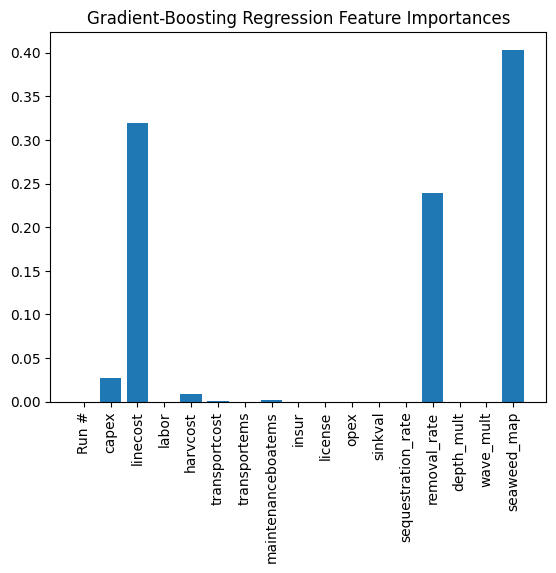

Gradient-Boosting Regression Training Accuracy: 0.9921
Gradient-Boosting Regression Testing Accuracy: 0.9797
Gradient-Boosting Regression Mean Squared Error: 38049.07 ppm
Gradient-Boosting Regression Accuracy: 94.66 %.
Gradient-Boosting Regression R²: 0.98


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Initiate Gradient-Boosting Regression model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Perform 10-fold cross-validation
scores = cross_val_score(gb, train_features, train_labels, cv=10, scoring='neg_mean_absolute_error')

# Fit the Gradient-Boosting Regression model on training data
gb.fit(train_features, train_labels)

# Use the Gradient-Boosting Regression model's predict method on the test data
predictions_gb = gb.predict(test_features)

# Calculate the absolute errors
errors_gb = abs(predictions_gb - test_labels)

# Calculate mean squared error (MSE)
mse_gb = mean_squared_error(test_labels, predictions_gb)
print('Gradient-Boosting Regression Mean Squared Error:', round(mse_gb, 2), 'ppm')

# Calculate R²
r2_gb = r2_score(test_labels, predictions_gb)
print('Gradient-Boosting Regression R²:', round(r2_gb, 2))

# Calculate mean absolute error (MAE)
mae_gb = round(np.mean(errors_gb), 2)
print('Gradient-Boosting Regression Mean Absolute Error:', mae_gb, 'ppm')

# Calculate mean absolute percentage error (MAPE)
mape_gb = 100 * (errors_gb / test_labels)

# Calculate and display accuracy
accuracy_gb = 100 - np.mean(mape_gb)
print('Gradient-Boosting Regression Accuracy:', round(accuracy_gb, 2), '%.')

# Get feature importances
importances_gb = gb.feature_importances_

# List of tuples with variable and importance
feature_importances_gb = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_gb)]

# Sort the feature importances by most important first
feature_importances_gb = sorted(feature_importances_gb, key=lambda x: x[1], reverse=True)

# Print out the feature and importances
[print('Variable: {:20} Gradient-Boosting Regression Importance: {}'.format(*pair)) for pair in feature_importances_gb]

# Plot the feature importances
import matplotlib.pyplot as plt
plt.bar(range(len(importances_gb)), importances_gb)
plt.xticks(range(len(importances_gb)), feature_list, rotation=90)
plt.title('Gradient-Boosting Regression Feature Importances')
plt.show()

# printing the training and testing accuracy
print('Gradient-Boosting Regression Training Accuracy: {:.4f}'.format(gb.score(train_features, train_labels)))
print('Gradient-Boosting Regression Testing Accuracy: {:.4f}'.format(gb.score(test_features, test_labels)))

# printing the mean squared error, accuracy and r2 score
print('Gradient-Boosting Regression Mean Squared Error:', round(mse_gb, 2), 'ppm')
print('Gradient-Boosting Regression Accuracy:', round(accuracy_gb, 2), '%.')
print('Gradient-Boosting Regression R²:', round(r2_gb, 2))


In [ ]:
# Print the mean accuracy and standard deviation
print("Gradient Boosting Regression: %0.2f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

Gradient Boosting Regression: -119.12 accuracy with a standard deviation of 6.1738


In [ ]:
# Plot the learning curve
plot_learning_curves(X_train=train_features,
                     y_train=train_labels,
                     X_test=test_features,
                     y_test=test_labels,
                     clf=gb,
                     scoring='mean_absolute_error',
                     print_model=False)
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Initiate XGBoost model with default hyperparameters
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Perform 10-fold cross-validation
scores = cross_val_score(xgb_model, train_features, train_labels, cv=10, scoring='neg_mean_absolute_error')

# Print the mean accuracy and standard deviation for the 10 folds
print("XGBoost: %0.2f MAE with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

# Train the XGBoost model on the training data
xgb_model.fit(train_features, train_labels)

# Print the training and testing accuracy
print('XGBoost Training accuracy {:.4f}'.format(xgb_model.score(train_features,train_labels)))
print('XGBoost Testing accuracy {:.4f}'.format(xgb_model.score(test_features,test_labels)))


XGBoost: -126.29 MAE with a standard deviation of 5.3752
XGBoost Training accuracy 0.9995
XGBoost Testing accuracy 0.9802


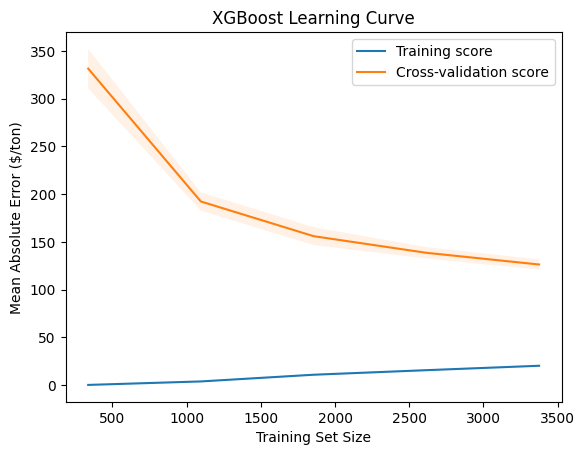

In [ ]:
from sklearn.model_selection import learning_curve

# Define the XGB model with default hyperparameters
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Calculate the training and testing scores using the learning_curve function
train_sizes, train_scores, test_scores = learning_curve(xgb_model, train_features, train_labels, cv=10, scoring='neg_mean_absolute_error')

# Calculate the mean and standard deviation for training and testing scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

# Add the standard deviation for both training and testing scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and legend
plt.xlabel("Training Set Size")
plt.ylabel("Mean Absolute Error ($/ton)")
plt.title("XGBoost Learning Curve")
plt.legend(loc="best")

plt.show()


XGB Accuracy: 92.23 %.
Variable: seaweed_map          XGB Importance: 0.3700000047683716
Variable: linecost             XGB Importance: 0.23999999463558197
Variable: removal_rate         XGB Importance: 0.20000000298023224
Variable: capex                XGB Importance: 0.03999999910593033
Variable: labor                XGB Importance: 0.019999999552965164
Variable: harvcost             XGB Importance: 0.019999999552965164
Variable: maintenanceboatems   XGB Importance: 0.019999999552965164
Variable: license              XGB Importance: 0.019999999552965164
Variable: depth_mult           XGB Importance: 0.019999999552965164
Variable: wave_mult            XGB Importance: 0.019999999552965164
Variable: Run #                XGB Importance: 0.009999999776482582
Variable: transportcost        XGB Importance: 0.009999999776482582
Variable: transportems         XGB Importance: 0.009999999776482582
Variable: insur                XGB Importance: 0.009999999776482582
Variable: opex                

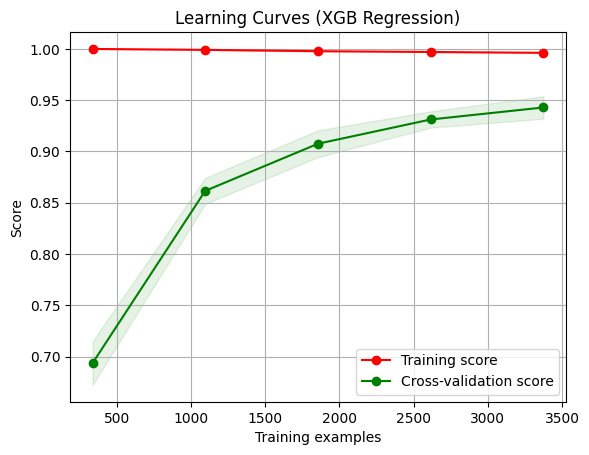

In [ ]:
import xgboost as xgb

# Initiate XGB model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 200, random_state = 42)

# Fit the XGB model on training data
xg_reg.fit(train_features, train_labels)

# Use the XGB model's predict method on the test data
predictions_xgb = xg_reg.predict(test_features)

# Calculate the absolute errors
errors_xgb = abs(predictions_xgb - test_labels)

# Calculate mean absolute percentage error (MAPE)
mape_xgb = 100 * (errors_xgb / test_labels)
# Calculate and display accuracy
accuracy_xgb = 100 - np.mean(mape_xgb)
print('XGB Accuracy:', round(accuracy_xgb, 2), '%.')

# Get feature importances
importances_xgb = xg_reg.feature_importances_

# List of tuples with variable and importance
feature_importances_xgb = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_xgb)]

# Sort the feature importances by most important first
feature_importances_xgb = sorted(feature_importances_xgb, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} XGB Importance: {}'.format(*pair)) for pair in feature_importances_xgb];
# Calculate mean squared error (MSE)
mse_xgb = mean_squared_error(test_labels, predictions_xgb)
print('XGB Mean Squared Error:', round(mse_xgb, 2), 'ppm')

# Calculate R²
r2_xgb = r2_score(test_labels, predictions_xgb)
print('XGB R²:', round(r2_xgb, 2))

# Calculate mean absolute error (MAE)
mae_xgb = round(np.mean(errors_xgb), 2)
print('XGB Mean Absolute Error:', mae_xgb, 'ppm')

# Calculate mean absolute percentage error (MAPE)
mape_xgb = 100 * (errors_xgb / test_labels)

# Calculate and display accuracy
accuracy_xgb = 100 - np.mean(mape_xgb)
print('XGB Accuracy:', round(accuracy_xgb, 2), '%.')
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Use the same train_features, train_labels and cross-validation (cv) settings as in your XGB model
title = "Learning Curves (XGB Regression)"
plot_learning_curve(xg_reg, title, train_features, train_labels, cv=10, n_jobs=-1)
plt.show()


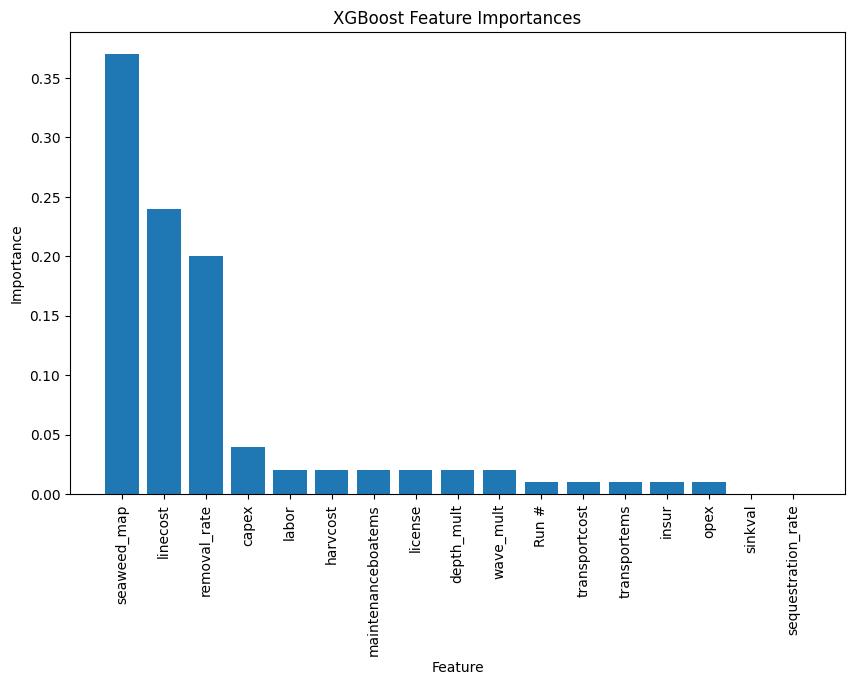

In [ ]:
# Create a dataframe from feature importances
import pandas as pd
df_importances_xgb = pd.DataFrame(feature_importances_xgb, columns=['feature', 'importance'])

# Plot feature importances as a bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(df_importances_xgb['feature'], df_importances_xgb['importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importances')
plt.show()


AdaBoost: -497.14 MAE with a standard deviation of 14.7296
AdaBoost Mean Squared Error: 330891.87 ppm
AdaBoost R²: 0.82
AdaBoost Mean Absolute Error: 481.28 ppm
AdaBoost Accuracy: 70.78 %.


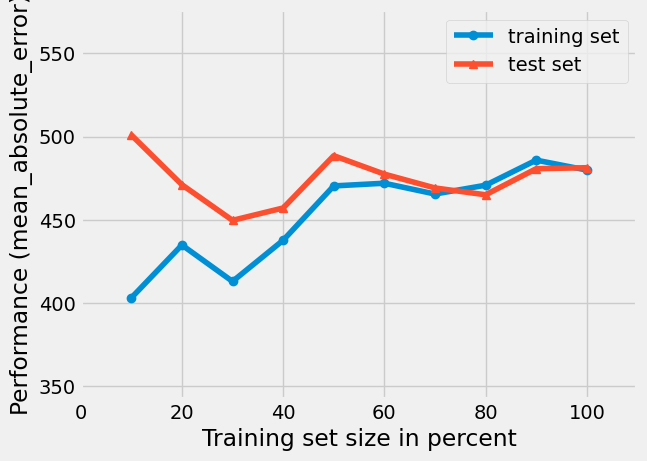

AdaBoost Training Accuracy 0.8336
AdaBoost Testing Accuracy 0.8232
AdaBoost Mean Squared Error: 330891.87 ppm
AdaBoost R²: 0.82
AdaBoost Mean Absolute Error: 481.28 ppm
AdaBoost Accuracy: 70.78 %.


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Initiate AdaBoost model with default hyperparameters
ada_reg = AdaBoostRegressor(random_state=42)

# Perform 10-fold cross-validation
scores = cross_val_score(ada_reg, train_features, train_labels, cv=10, scoring='neg_mean_absolute_error')

# Print the mean MAE and standard deviation for the 10 folds
print("AdaBoost: %0.2f MAE with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

# Train the AdaBoost model on the training data
ada_reg.fit(train_features, train_labels)

# Use the AdaBoost model's predict method on the test data
predictions_ada = ada_reg.predict(test_features)

# Calculate the absolute errors
errors_ada = abs(predictions_ada - test_labels)

# Calculate mean squared error (MSE)
mse_ada = mean_squared_error(test_labels, predictions_ada)
print('AdaBoost Mean Squared Error:', round(mse_ada, 2), 'ppm')

# Calculate R²
r2_ada = r2_score(test_labels, predictions_ada)
print('AdaBoost R²:', round(r2_ada, 2))

# Calculate mean absolute error (MAE)
mae_ada = round(np.mean(errors_ada), 2)
print('AdaBoost Mean Absolute Error:', mae_ada, 'ppm')

# Calculate mean absolute percentage error (MAPE)
mape_ada = 100 * (errors_ada / test_labels)

# Calculate and display accuracy
accuracy_ada = 100 - np.mean(mape_ada)
print('AdaBoost Accuracy:', round(accuracy_ada, 2), '%.')

# Plot the learning curve
plot_learning_curves(X_train=train_features,
                     y_train=train_labels,
                     X_test=test_features,
                     y_test=test_labels,
                     clf=ada_reg,
                     scoring='mean_absolute_error',
                     print_model=False)
plt.show()

# Printing the training and testing accuracy
print('AdaBoost Training Accuracy {:.4f}'.format(ada_reg.score(train_features,train_labels)))
print('AdaBoost Testing Accuracy {:.4f}'.format(ada_reg.score(test_features,test_labels)))
print('AdaBoost Mean Squared Error:', round(mse_ada, 2), 'ppm')
print('AdaBoost R²:', round(r2_ada, 2))
print('AdaBoost Mean Absolute Error:', mae_ada, 'ppm')
print('AdaBoost Accuracy:', round(accuracy_ada, 2), '%.')


In [ ]:
# Import the AdaBoostRegressor model
from sklearn.ensemble import AdaBoostRegressor

# Initiate AdaBoost model with 200 decision trees
ada = AdaBoostRegressor(n_estimators=200, random_state=42)

# Perform 10-fold cross-validation
scores = cross_val_score(ada, train_features, train_labels, cv=10, scoring='neg_mean_absolute_error')

# Print the mean accuracy and standard deviation for the 10 folds
print("AdaBoost: %0.2f MAE with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

# Fit the AdaBoost model on training data
ada.fit(train_features, train_labels)

# Use the AdaBoost model's predict method on the test data
predictions_ada = ada.predict(test_features)

# Calculate the absolute errors
errors_ada = abs(predictions_ada - test_labels)

# Calculate mean absolute percentage error (MAPE)
mape_ada = 100 * (errors_ada / test_labels)

# Calculate and display accuracy
accuracy_ada = 100 - np.mean(mape_ada)
print('AdaBoost Accuracy:', round(accuracy_ada, 2), '%.')

# Get feature importances
importances_ada = ada.feature_importances_

# List of tuples with variable and importance
feature_importances_ada = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_ada)]

# Sort the feature importances by most important first
feature_importances_ada = sorted(feature_importances_ada, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} AdaBoost Importance: {}'.format(*pair)) for pair in feature_importances_ada];


AdaBoost: -608.15 MAE with a standard deviation of 15.7581
AdaBoost Accuracy: 62.58 %.
Variable: seaweed_map          AdaBoost Importance: 0.32
Variable: linecost             AdaBoost Importance: 0.28
Variable: removal_rate         AdaBoost Importance: 0.26
Variable: capex                AdaBoost Importance: 0.09
Variable: harvcost             AdaBoost Importance: 0.02
Variable: depth_mult           AdaBoost Importance: 0.02
Variable: Run #                AdaBoost Importance: 0.0
Variable: labor                AdaBoost Importance: 0.0
Variable: transportcost        AdaBoost Importance: 0.0
Variable: transportems         AdaBoost Importance: 0.0
Variable: maintenanceboatems   AdaBoost Importance: 0.0
Variable: insur                AdaBoost Importance: 0.0
Variable: license              AdaBoost Importance: 0.0
Variable: opex                 AdaBoost Importance: 0.0
Variable: sinkval              AdaBoost Importance: 0.0
Variable: sequestration_rate   AdaBoost Importance: 0.0
Variable: w

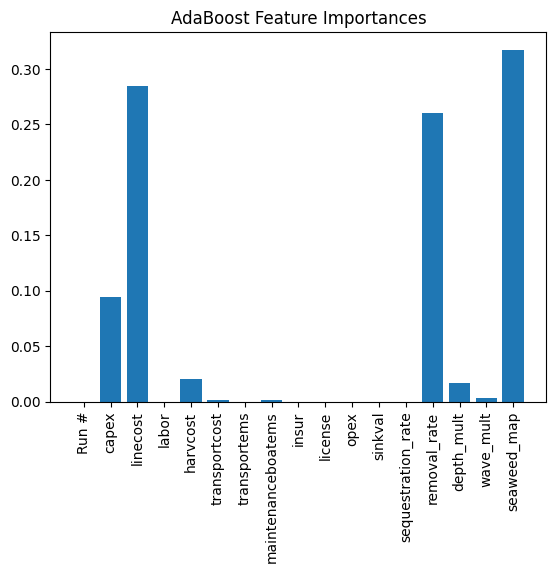

In [ ]:
# Get feature importances
importances_ada = ada.feature_importances_

# Create a bar chart of feature importances
plt.bar(range(len(importances_ada)), importances_ada)
plt.xticks(range(len(importances_ada)), feature_list, rotation=90)
plt.title('AdaBoost Feature Importances')
plt.show()


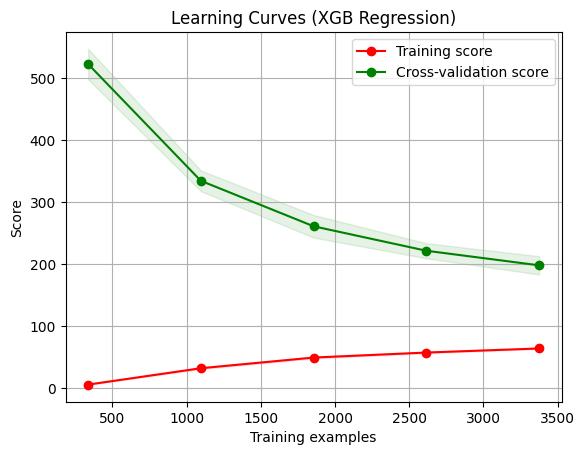

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_absolute_error')
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Use the same train_features, train_labels and cross-validation (cv) settings as in your XGB model
title = "Learning Curves (XGB Regression)"
plot_learning_curve(xg_reg, title, train_features, train_labels, cv=10, n_jobs=-1)
plt.show()


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initiate RF model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
scores = cross_val_score(rf, train_features, train_labels, cv = 10)
print("random forest: %0.2f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))
# Train the model on training data
rf.fit(train_features, train_labels);

random forest: 0.97 accuracy with a standard deviation of 0.0055


Random Forest Mean Squared Error: 62430.01 ppm
Random Forest R²: 0.97
Random Forest Mean Absolute Error: 169.08 ppm
Random Forest Accuracy: 92.82 %.


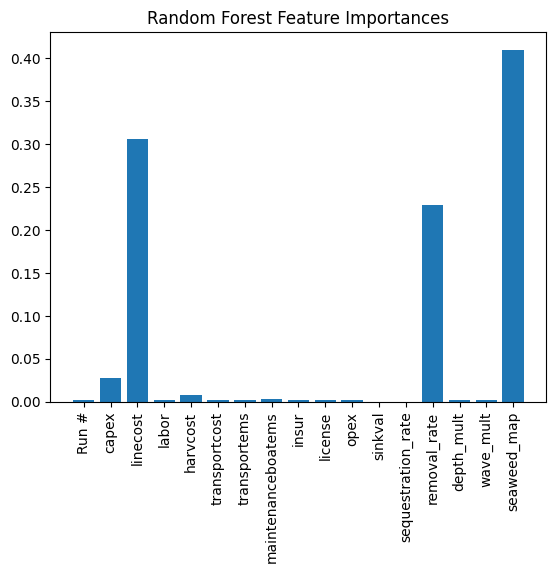

Random Forest Training Accuracy 0.9958
Random Forest Testing Accuracy 0.9666
Random Forest Mean Squared Error: 62430.01 ppm
Random Forest R²: 0.97
Random Forest Mean Absolute Error: 169.08 ppm
Random Forest Accuracy: 92.82 %.


In [ ]:
predictions_rf = rf.predict(test_features)
errors_rf = abs(predictions_rf - test_labels)
mse_rf = mean_squared_error(test_labels, predictions_rf)
print('Random Forest Mean Squared Error:', round(mse_rf, 2), 'ppm')
r2_rf = r2_score(test_labels, predictions_rf)
print('Random Forest R²:', round(r2_rf, 2))
mae_rf = round(np.mean(errors_rf), 2)
print('Random Forest Mean Absolute Error:', mae_rf, 'ppm')
mape_rf = 100 * (errors_rf / test_labels)
accuracy_rf = 100 - np.mean(mape_rf)
print('Random Forest Accuracy:', round(accuracy_rf, 2), '%.')
importances_rf = rf.feature_importances_
feature_importances_rf = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_rf)]
feature_importances_rf = sorted(feature_importances_rf, key = lambda x: x[1], reverse = True)
import matplotlib.pyplot as plt
plt.bar(range(len(importances_rf)), importances_rf)
plt.xticks(range(len(importances_rf)), feature_list, rotation=90)
plt.title('Random Forest Feature Importances')
plt.show()
print('Random Forest Training Accuracy {:.4f}'.format(rf.score(train_features,train_labels)))
print('Random Forest Testing Accuracy {:.4f}'.format(rf.score(test_features,test_labels)))
print('Random Forest Mean Squared Error:', round(mse_rf, 2), 'ppm')
print('Random Forest R²:', round(r2_rf, 2))
print('Random Forest Mean Absolute Error:', mae_rf, 'ppm')
print('Random Forest Accuracy:', round(accuracy_rf, 2), '%.')


In [ ]:
importances_rf = rf.feature_importances_
feature_importances_rf = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_rf)]
feature_importances_rf = sorted(feature_importances_rf, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} RF Importance: {}'.format(*pair)) for pair in feature_importances_rf];


Variable: seaweed_map          RF Importance: 0.41
Variable: linecost             RF Importance: 0.31
Variable: removal_rate         RF Importance: 0.23
Variable: capex                RF Importance: 0.03
Variable: harvcost             RF Importance: 0.01
Variable: Run #                RF Importance: 0.0
Variable: labor                RF Importance: 0.0
Variable: transportcost        RF Importance: 0.0
Variable: transportems         RF Importance: 0.0
Variable: maintenanceboatems   RF Importance: 0.0
Variable: insur                RF Importance: 0.0
Variable: license              RF Importance: 0.0
Variable: opex                 RF Importance: 0.0
Variable: sinkval              RF Importance: 0.0
Variable: sequestration_rate   RF Importance: 0.0
Variable: depth_mult           RF Importance: 0.0
Variable: wave_mult            RF Importance: 0.0


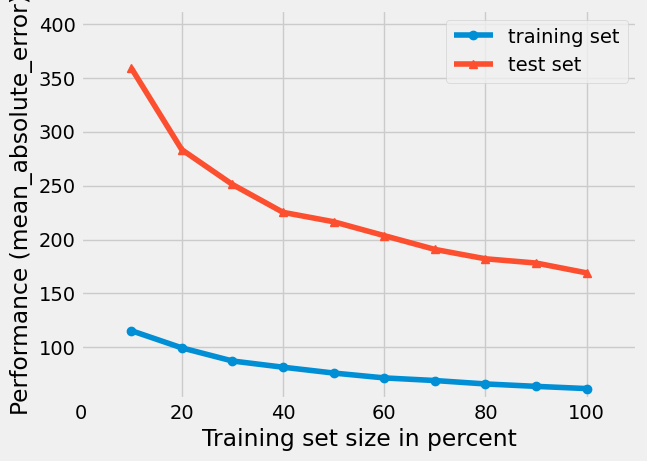

In [ ]:
from mlxtend.plotting import plot_learning_curves

# Initiate RF model with 200 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)

# plotting the learning curve
plot_learning_curves(X_train=train_features,
                     y_train=train_labels,
                     X_test=test_features,
                     y_test=test_labels,
                     clf=rf,
                     scoring='mean_absolute_error',
                     print_model=False)
plt.show()


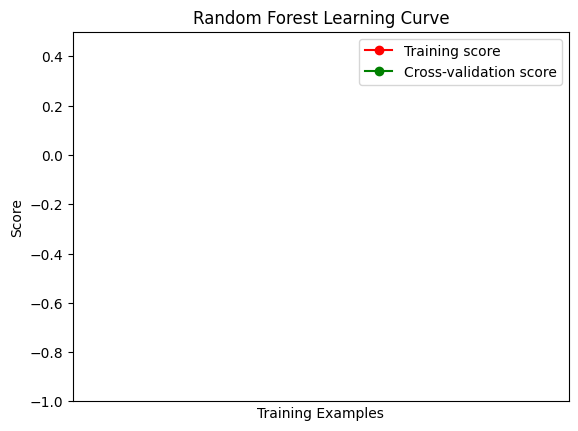

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    rf, train_features, train_labels, cv=10, scoring='neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Random Forest Learning Curve')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.ylim(-1.0, 0.5)
plt.xticks(np.arange(0, train_sizes.size, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.legend(loc="best")
plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
svr = SVR(kernel='rbf', C=100, gamma='scale')
scores_svr = cross_val_score(svr, train_features, train_labels, cv=10, scoring='neg_mean_absolute_error')
svr.fit(train_features, train_labels)
predictions_svr = svr.predict(test_features)
errors_svr = abs(predictions_svr - test_labels)
print('Support Vector Regression Mean Absolute Error:', round(np.mean(errors_svr), 2), 'ppm')
mape_svr = 100 * (errors_svr / test_labels)
accuracy_svr = 100 - np.mean(mape_svr)
print('Support Vector Regression Accuracy:', round(accuracy_svr, 2), '%.')
rmse_svr = np.sqrt(mean_squared_error(test_labels, predictions_svr))
print('Support Vector Regression RMSE:', round(rmse_svr, 2), 'ppm')
r2_svr = r2_score(test_labels, predictions_svr)
print('Support Vector Regression R^2:', round(r2_svr, 2))
print('Support Vector Regression Training Accuracy {:.4f}'.format(svr.score(train_features, train_labels)))
print('Support Vector Regression Testing Accuracy {:.4f}'.format(svr.score(test_features, test_labels)))


Support Vector Regression Mean Absolute Error: 985.21 ppm
Support Vector Regression Accuracy: 55.69 %.
Support Vector Regression RMSE: 1395.71 ppm
Support Vector Regression R^2: -0.04
Support Vector Regression Training Accuracy -0.0289
Support Vector Regression Testing Accuracy -0.0409


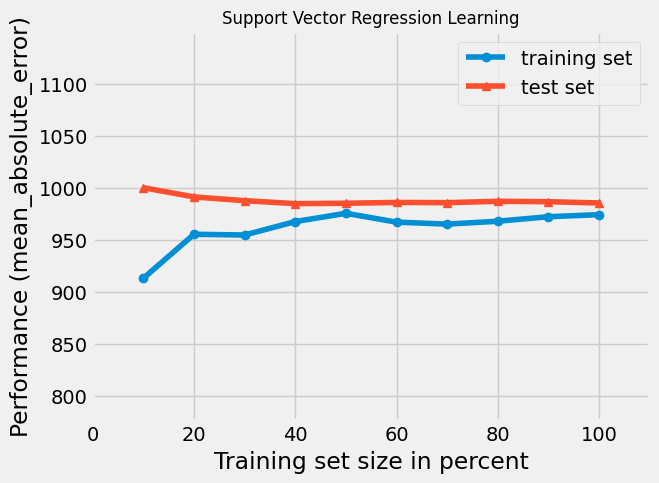

In [ ]:
from mlxtend.plotting import plot_learning_curves

# Train the Elastic Net model
svr.fit(train_features, train_labels)

# Plot learning curve for Elastic Net
plot_learning_curves(X_train=train_features,
                     y_train=train_labels,
                     X_test=test_features,
                     y_test=test_labels,
                     clf=svr,
                     scoring='mean_absolute_error',
                     print_model=False)
plt.title("Support Vector Regression Learning")
plt.show()

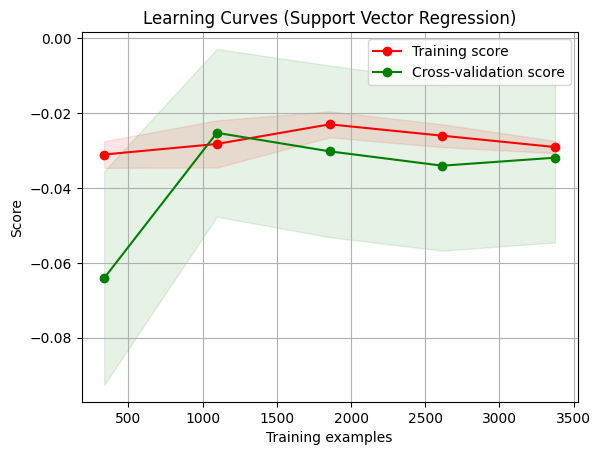

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Use the same train_features, train_labels and cross-validation (cv) settings as in your SVR model
title = "Learning Curves (Support Vector Regression)"
plot_learning_curve(svr, title, train_features, train_labels, cv=10, n_jobs=-1)
plt.show()

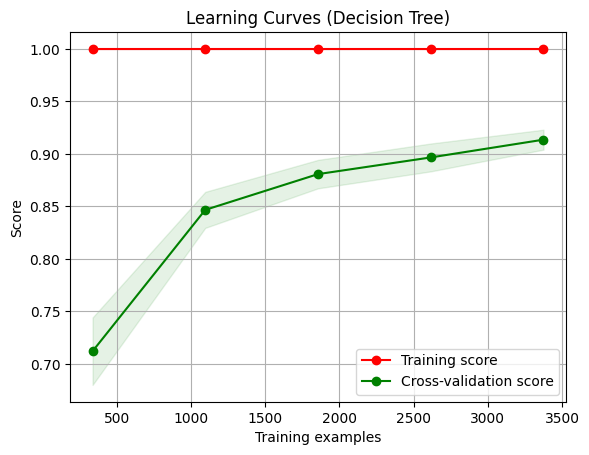

'decision_tree.pdf'

In [ ]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree model
dt = DecisionTreeRegressor(random_state=42)
scores_dt = cross_val_score(dt, train_features, train_labels, cv=10, scoring='neg_mean_absolute_error')
dt.fit(train_features, train_labels)

# Plot the learning curve for Decision Tree model
title = "Learning Curves (Decision Tree)"
plot_learning_curve(dt, title, train_features, train_labels, cv=10, n_jobs=-1)
plt.show()

# Visualize the decision tree (limit the depth to make it more interpretable)
dt_viz = DecisionTreeRegressor(random_state=42, max_depth=3)
dt_viz.fit(train_features, train_labels)

dot_data = tree.export_graphviz(dt_viz, out_file=None, feature_names=feature_list, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # This will save the decision tree visualization as a PDF file
graph.view()  # This will open the PDF file


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree model
dt = DecisionTreeRegressor(random_state=42)
scores_dt = cross_val_score(dt, train_features, train_labels, cv=10, scoring='neg_mean_absolute_error')
dt.fit(train_features, train_labels)
predictions_dt = dt.predict(test_features)
errors_dt = abs(predictions_dt - test_labels)

# Print evaluation metrics
print('Decision Tree Mean Absolute Error:', round(np.mean(errors_dt), 2), 'ppm')
mape_dt = 100 * (errors_dt / test_labels)
accuracy_dt = 100 - np.mean(mape_dt)
print('Decision Tree Accuracy:', round(accuracy_dt, 2), '%.')
rmse_dt = np.sqrt(mean_squared_error(test_labels, predictions_dt))
print('Decision Tree RMSE:', round(rmse_dt, 2), 'ppm')
r2_dt = r2_score(test_labels, predictions_dt)
print('Decision Tree R^2:', round(r2_dt, 2))
print('Decision Tree Training Accuracy {:.4f}'.format(dt.score(train_features, train_labels)))
print('Decision Tree Testing Accuracy {:.4f}'.format(dt.score(test_features, test_labels)))


Decision Tree Mean Absolute Error: 292.55 ppm
Decision Tree Accuracy: 87.57 %.
Decision Tree RMSE: 417.69 ppm
Decision Tree R^2: 0.91
Decision Tree Training Accuracy 1.0000
Decision Tree Testing Accuracy 0.9068


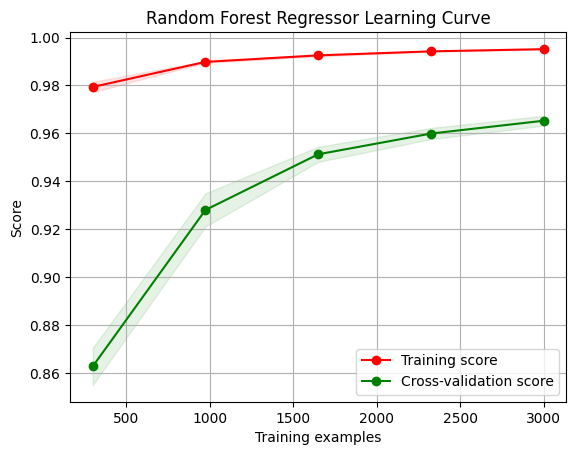

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve

# Initiate RF model with 200 decision trees
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(rf, train_features, train_labels, cv=5, random_state=42)

# Calculate the mean and standard deviation of train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Random Forest Regressor Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Ridge Regression
ridge_reg = Ridge(random_state=42)

scores = cross_val_score(ridge_reg, train_features, train_labels, cv=10)
print("Ridge: %0.2f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

ridge_reg.fit(train_features, train_labels)

print('Ridge Training accuracy {:.4f}'.format(ridge_reg.score(train_features, train_labels)))
print('Ridge Testing accuracy {:.4f}'.format(ridge_reg.score(test_features, test_labels)))

predictions_ridge = ridge_reg.predict(test_features)

mse_ridge = mean_squared_error(test_labels, predictions_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(test_labels, predictions_ridge)

print('Ridge RMSE: {:.2f} ppm'.format(rmse_ridge))
print('Ridge R^2: {:.2f}'.format(r2_ridge))

# Lasso Regression
lasso_reg = Lasso(random_state=42)

scores = cross_val_score(lasso_reg, train_features, train_labels, cv=10)
print("Lasso: %0.2f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

lasso_reg.fit(train_features, train_labels)

print('Lasso Training accuracy {:.4f}'.format(lasso_reg.score(train_features, train_labels)))
print('Lasso Testing accuracy {:.4f}'.format(lasso_reg.score(test_features, test_labels)))

predictions_lasso = lasso_reg.predict(test_features)

mse_lasso = mean_squared_error(test_labels, predictions_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(test_labels, predictions_lasso)

print('Lasso RMSE: {:.2f} ppm'.format(rmse_lasso))
print('Lasso R^2: {:.2f}'.format(r2_lasso))

from sklearn.metrics import mean_absolute_error

# Ridge Regression
mae_ridge = mean_absolute_error(test_labels, predictions_ridge)
print('Ridge Mean Absolute Error:', round(mae_ridge, 2), 'ppm')

errors_ridge = abs(predictions_ridge - test_labels)
mape_ridge = 100 * (errors_ridge / test_labels)
accuracy_ridge = 100 - np.mean(mape_ridge)
print('Ridge Accuracy:', round(accuracy_ridge, 2), '%.')

# Lasso Regression
mae_lasso = mean_absolute_error(test_labels, predictions_lasso)
print('Lasso Mean Absolute Error:', round(mae_lasso, 2), 'ppm')

errors_lasso = abs(predictions_lasso - test_labels)
mape_lasso = 100 * (errors_lasso / test_labels)
accuracy_lasso = 100 - np.mean(mape_lasso)
print('Lasso Accuracy:', round(accuracy_lasso, 2), '%.')



Ridge: 0.82 accuracy with a standard deviation of 0.0173
Ridge Training accuracy 0.8259
Ridge Testing accuracy 0.8203
Ridge RMSE: 579.92 ppm
Ridge R^2: 0.82
Lasso: 0.82 accuracy with a standard deviation of 0.0173
Lasso Training accuracy 0.8258
Lasso Testing accuracy 0.8200
Lasso RMSE: 580.34 ppm
Lasso R^2: 0.82
Ridge Mean Absolute Error: 396.01 ppm
Ridge Accuracy: 79.24 %.
Lasso Mean Absolute Error: 396.3 ppm
Lasso Accuracy: 79.26 %.


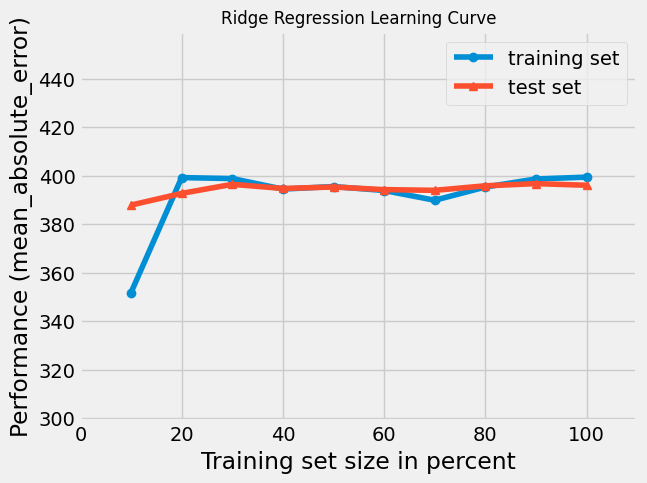

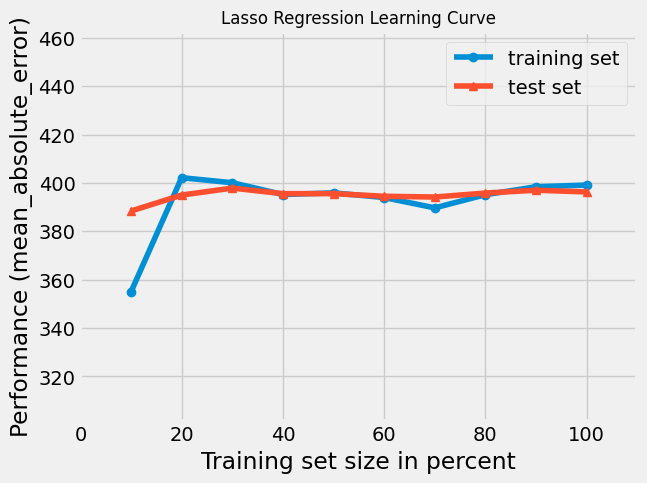

In [ ]:
# Plot learning curve for Ridge Regression
plot_learning_curves(X_train=train_features,
                     y_train=train_labels,
                     X_test=test_features,
                     y_test=test_labels,
                     clf=ridge_reg,
                     scoring='mean_absolute_error',
                     print_model=False)
plt.title("Ridge Regression Learning Curve")
plt.show()

# Plot learning curve for Lasso Regression
plot_learning_curves(X_train=train_features,
                     y_train=train_labels,
                     X_test=test_features,
                     y_test=test_labels,
                     clf=lasso_reg,
                     scoring='mean_absolute_error',
                     print_model=False)
plt.title("Lasso Regression Learning Curve")
plt.show()




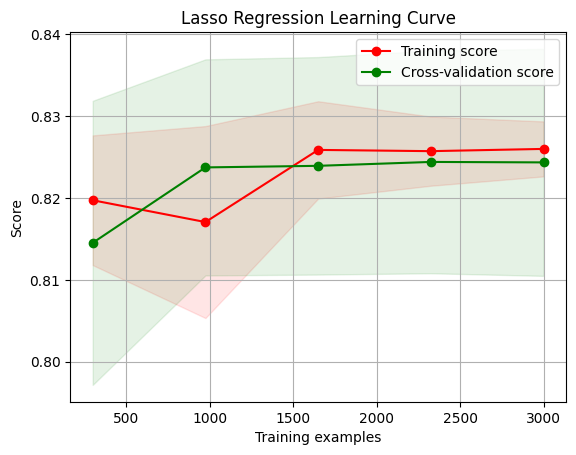

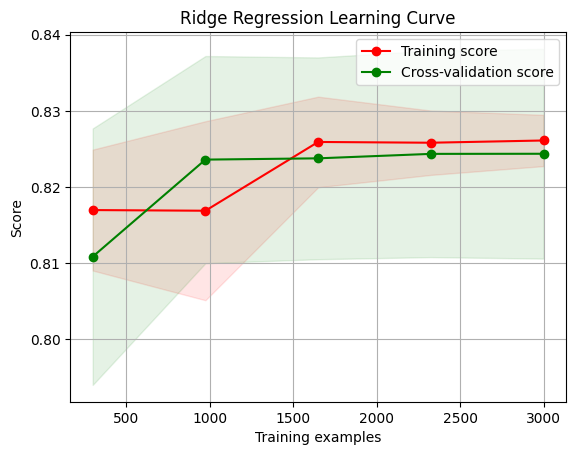

Lasso Mean Absolute Error: 396.30 ppm
Ridge Mean Absolute Error: 396.01 ppm


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error

# Initiate Lasso and Ridge models with default hyperparameters
lasso_reg = Lasso(random_state=42)
ridge_reg = Ridge(random_state=42)

# Function to plot learning curves for different models
def plot_learning_curves(model, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, train_features, train_labels, cv=5, random_state=42)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(f"{model_name} Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Plot the learning curves for Lasso and Ridge Regression
plot_learning_curves(lasso_reg, "Lasso Regression")
plot_learning_curves(ridge_reg, "Ridge Regression")

# Calculate the mean absolute error (MAE) for Lasso and Ridge Regression
mae_lasso = mean_absolute_error(test_labels, predictions_lasso)
mae_ridge = mean_absolute_error(test_labels, predictions_ridge)

# Print the MAE
print('Lasso Mean Absolute Error: {:.2f} ppm'.format(mae_lasso))
print('Ridge Mean Absolute Error: {:.2f} ppm'.format(mae_ridge))


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initiate RF model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
scores = cross_val_score(rf, train_features, train_labels, cv = 10)
print("Random Forest Regressor: %0.2f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

# Train the model on training data
rf.fit(train_features, train_labels)

# Print training and testing accuracy
print('Random Forest Regressor Training accuracy {:.4f}'.format(rf.score(train_features,train_labels)))
print('Random Forest Regressor Testing accuracy {:.4f}'.format(rf.score(test_features,test_labels)))


Random Forest Regressor: 0.97 accuracy with a standard deviation of 0.0055
Random Forest Regressor Training accuracy 0.9958
Random Forest Regressor Testing accuracy 0.9666


[0.98001185 0.98926722 0.99035619 0.99025266 0.99115665 0.98482965
 0.99060675 0.98936261 0.99171073 0.98398732]


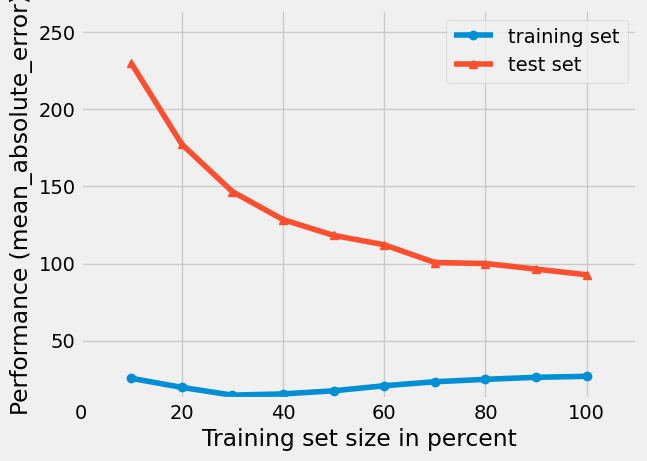

LGBM: 0.99 accuracy with a standard deviation of 0.0037
LGBM Training accuracy 0.9991
LGBM Testing accuracy 0.9857


In [ ]:
# Initiate LGMB model
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_learning_curves

clf = lgbm.LGBMClassifier(objective='binary',random_state=42)  # or 'mutliclass'
reg = lgbm.LGBMRegressor(n_estimators = 200, learning_rate = 0.1, saved_feature_importance_type = 1, random_state = 42)  # default - 'regression'
scores = cross_val_score(reg, train_features, train_labels, cv = 10)
print(scores)

# plotting the learning curve
plot_learning_curves(X_train=train_features,
                     y_train=train_labels,
                     X_test=test_features,
                     y_test=test_labels,
                     clf=reg,
                     scoring='mean_absolute_error',
                     print_model=False)
# plt.ylim(top=0.1, bottom=-0.025)
plt.show()

reg.fit(train_features, train_labels);
print("LGBM: %0.2f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))
print('LGBM Training accuracy {:.4f}'.format(reg.score(train_features,train_labels)))
print('LGBM Testing accuracy {:.4f}'.format(reg.score(test_features,test_labels)))

In [ ]:
# Calculate mean absolute percentage error (MAPE)
# import sys
# np.set_printoptions(threshold=sys.maxsize)
errors_RF = errors_RF[test_labels != 0]
test_labels = test_labels[test_labels != 0]
## test_labels = abs(test_labels)
mape = 100 * (errors_RF / test_labels)
# print(errors)
# print(test_labels)
# Calculate and display accuracy
accuracy_RF = 100 - np.mean(mape)
print('RF Accuracy:', round(accuracy_RF, 2), '%.')

# Calculate mean absolute percentage error (MAPE)
# import sys
# np.set_printoptions(threshold=sys.maxsize)
errors_LGBM = errors_LGBM[test_labels != 0]
test_labels = test_labels[test_labels != 0]
## test_labels = abs(test_labels)
mape = 100 * (errors_LGBM / test_labels)
# print(errors)
# print(test_labels)
# Calculate and display accuracy
accuracy_LGBM = 100 - np.mean(mape)
print('LGBM Accuracy:', round(accuracy_LGBM, 2), '%.')

NameError: ignored

In [ ]:
# Get numerical feature importances
importances_RF = list(rf.feature_importances_)
importances_LGBM  = list(reg.booster_.feature_importance(importance_type='gain')/ sum(reg.booster_.feature_importance(importance_type='gain')))
# importances_LGBM  = list(reg.feature_importances_/ sum(reg.feature_importances_))

# List of tuples with variable and importance
feature_importances_RF = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_RF)]
feature_importances_LGBM = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_LGBM)]


# Sort the feature importances by most important first
feature_importances_RF = sorted(feature_importances_RF, key = lambda x: x[1], reverse = True)
feature_importances_LGBM = sorted(feature_importances_LGBM, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} RF Importance: {}'.format(*pair)) for pair in feature_importances_RF];
print('\n')
[print('Variable: {:20} LGBM Importance: {}'.format(*pair)) for pair in feature_importances_LGBM];